# SI 618 - Homework #3: Data Visualization

Version 2024.01.31.3.CT

For this homework assignment, you will use the small MovieLens dataset, available via https://files.grouplens.org/datasets/movielens/ml-latest-small.zip. Download that file to get the data, and also take some time to go through the [README](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) file.

Be sure to download your own copy of the dataset -- do not rely on data that you may have downloaded for a previous assignment.

A major challenge for you in this assignment is to devise a plan to tackle each question.  The question states the overall goal, and in some cases hints are provided, but you will need to think carefully about what data you need to answer each of the questions.  You may need to do some preprocessing of the data to get it into a form that you can use for visualization.


Each of the questions is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

**NOTE**: You are only permitted to use the pandas, Seaborn, and matplotlib libraries for creating visualizations in this assignment. You may use other libraries for other purposes, but you may not use them to create visualizations.

<hr>

First, let's do our usual imports (you might need to import additional modules depending on how you choose to tackle each question):

In [1489]:
MY_UNIQNAME = 'JSANDEEP'

In [1432]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

And let's read the data (note: you might need to include path information when you read the data in, depending on where you place the data file):

In [1433]:
movies = pd.read_csv('/Users/sandeepjala/Documents/SI618/SI_618_WN_24_Files/data/ml-latest-small/movies.csv')
ratings = pd.read_csv('/Users/sandeepjala/Documents/SI618/SI_618_WN_24_Files/data/ml-latest-small/ratings.csv')
tags = pd.read_csv('/Users/sandeepjala/Documents/SI618/SI_618_WN_24_Files/data/ml-latest-small/tags.csv')
links = pd.read_csv('/Users/sandeepjala/Documents/SI618/SI_618_WN_24_Files/data/ml-latest-small/links.csv')

In [1434]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [1435]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [1436]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [1437]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [1438]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [1439]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [1440]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [1441]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


### Q1: 
Using the `movies` DataFrame, create a visualization that shows the number of movies for each decade from the 1900s to the 2010s.  Use the number in parentheses (e.g. (1975)) at the end of the title as the year.  Drop all rows that do not have a valid year. Be sure to include a title and axis labels.

In [1442]:
movies['year'] = movies['title'].str.extract(r'.*\((\d{4})\).*', expand=False)

In [1443]:
movies['year'] = pd.to_numeric(movies['year'], errors='coerce') # coerce will introduce NA values for non-numeric data in the columns

In [1444]:
movies[movies['year'].isnull() == True]

,movieId,title,genres,year
6059,40697,Babylon 5,Sci-Fi,NaN
9031,140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
9091,143410,Hyena Road,(no genres listed),NaN
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
9179,149334,Nocturnal Animals,Drama|Thriller,NaN
9259,156605,Paterson,(no genres listed),NaN
9367,162414,Moonlight,Drama,NaN
9448,167570,The OA,(no genres listed),NaN
9514,171495,Cosmos,(no genres listed),NaN
9515,171631,Maria Bamford: Old Baby,(no genres listed),NaN


In [1445]:
movies.dropna(subset=['year'], inplace=True)

In [1446]:
movies[movies['year'] < 1900]

,movieId,title,genres,year


In [1447]:
movies['year'].describe()

count    9729.000000
mean     1994.613629
std        18.535219
min      1902.000000
25%      1988.000000
50%      1999.000000
75%      2008.000000
max      2018.000000
Name: year, dtype: float64

In [1490]:
def get_decade(Data):
    """ This function takes a row of data and returns the decade of the year from 1900s to 2010s."""
    if Data['year'] < 1900:
        return 'Before 1900s'
    elif Data['year'] < 1910:
        return '1900s'
    elif Data['year'] < 1920:
        return '1910s'
    elif Data['year'] < 1930:
        return '1920s'
    elif Data['year'] < 1940:
        return '1930s'
    elif Data['year'] < 1950:
        return '1940s'
    elif Data['year'] < 1960:
        return '1950s'
    elif Data['year'] < 1970:
        return '1960s'
    elif Data['year'] < 1980:
        return '1970s'
    elif Data['year'] < 1990:
        return '1980s'
    elif Data['year'] < 2000:
        return '1990s'
    elif Data['year'] < 2010:
        return '2000s'
    elif Data['year'] < 2020:
        return '2010s'
    else:
        return 'After 2010s'

In [1449]:
movies['decade'] = movies.apply(get_decade, axis=1)

In [1450]:
movies.decade.value_counts()

decade
2000s    2849
1990s    2212
2010s    1931
1980s    1177
1970s     500
1960s     401
1950s     279
1940s     197
1930s     136
1920s      37
1910s       7
1900s       3
Name: count, dtype: int64

In [1451]:
Filtered_decades = movies[~((movies['decade'] == 'Before 1900s') | (movies['decade'] == 'After 2010s'))].copy()

In [1452]:
Filtered_decades['decade'] = pd.Categorical(Filtered_decades['decade'], categories=['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'], ordered=True) # This will order the decades in the order of the years
Filtered_decades.decade.value_counts()


decade
2000s    2849
1990s    2212
2010s    1931
1980s    1177
1970s     500
1960s     401
1950s     279
1940s     197
1930s     136
1920s      37
1910s       7
1900s       3
Name: count, dtype: int64

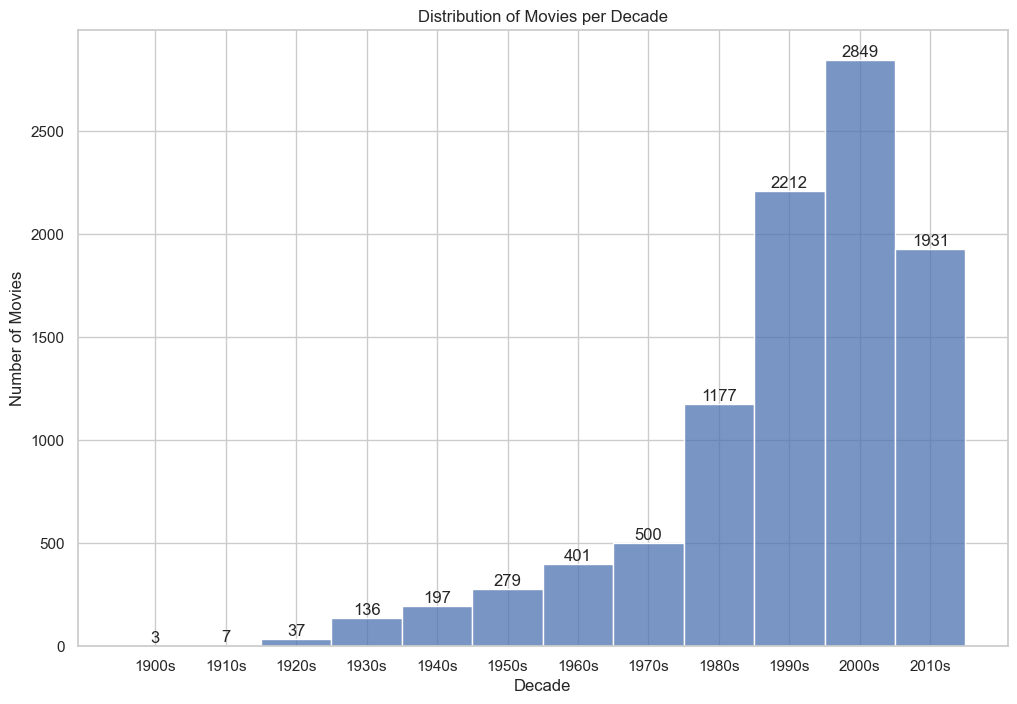

In [1453]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=Filtered_decades, x='decade') # This will create a histogram of the decades
ax.set(xlabel='Decade', ylabel='Number of Movies', title='Distribution of Movies per Decade')
ax.bar_label(ax.containers[0])
plt.show()

We can see a rising graph, the number of movies released each year is increasing, but we cannot predict how many movies will be released in the future with certainty. This is because the number of movies in the 2010s is lower than in the 2000s. The trend breaks, this could be because we only considered data until September 26, 2018. The data didn't cover the entire decade.

We also see a significant increase between the 1970s and 1980s, when independent films first became popular. Maybe that's one of the reasons. However, other factors, such as industrial and technological development, may also play a role.

### Q2: 
Create a visualization that shows the number of movies in each genre.

**Hint**: the `pd.DataFrame.explode()` function might be useful here.

Be sure that your axis labels are legible!

In [1454]:
movies['genres'] = movies['genres'].str.split('|') # This will split the genres by '|'

In [1455]:
exploded_movie = movies.explode('genres') # This will explode the genres column so that each row has only one genre

In [1456]:
exploded_movie

,movieId,title,genres,year,decade
0,1,Toy Story (1995),Adventure,1995.0,1990s
0,1,Toy Story (1995),Animation,1995.0,1990s
0,1,Toy Story (1995),Children,1995.0,1990s
0,1,Toy Story (1995),Comedy,1995.0,1990s
0,1,Toy Story (1995),Fantasy,1995.0,1990s
...,...,...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy,2017.0,2010s
9739,193585,Flint (2017),Drama,2017.0,2010s
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,2018.0,2010s
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,2018.0,2010s


In [1457]:
exploded_movie['genres'].value_counts()

genres
Drama                 4359
Comedy                3756
Thriller              1892
Action                1827
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 978
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      25
Name: count, dtype: int64

/var/folders/5s/fpydwv6n7kzb46w2tptt4bjr0000gn/T/ipykernel_4696/2008589864.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


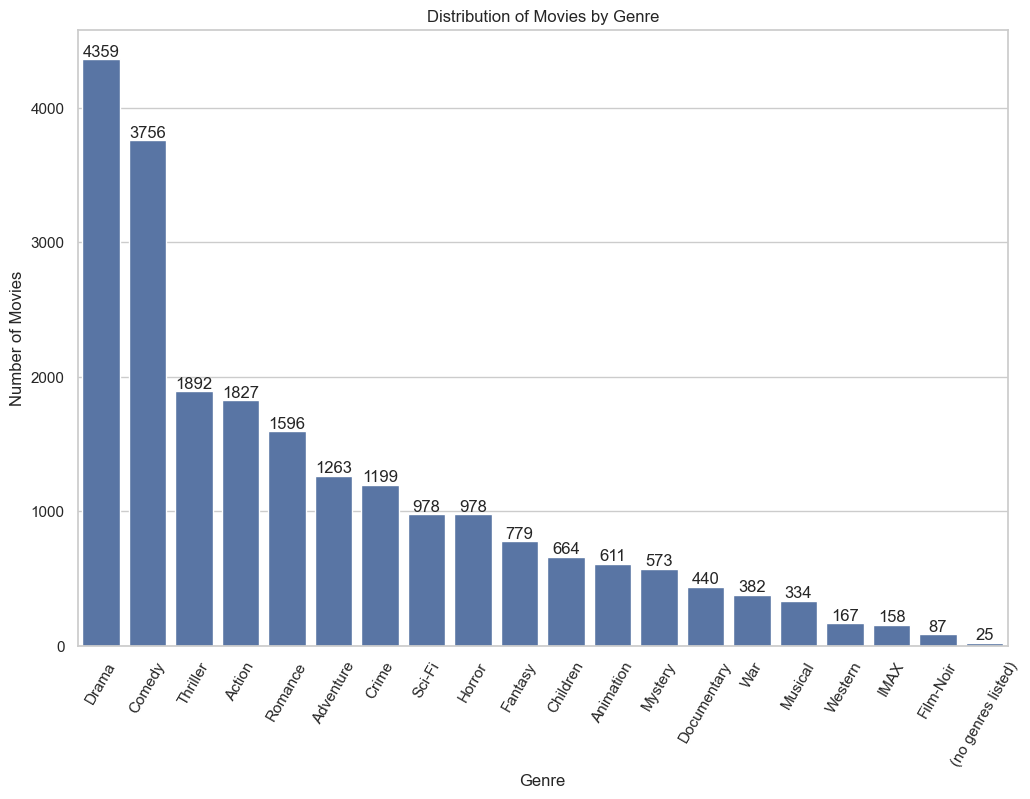

In [1458]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=exploded_movie, x='genres', order=exploded_movie['genres'].value_counts().index) # This will create a countplot of the genres
ax.set(xlabel='Genre', ylabel='Number of Movies', title='Distribution of Movies by Genre')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

We can see that drama is the most popular genre, followed by comedy, this could be because these genres are frequently combined with other genres, such as horror-comedy, romance-drama, and so on.

We also see that there are 25 non-genre movies listed, which may be due to some error in the database.




### Q3a: 
Create a visualization showing the distribution of the values from the `rating` column of the `ratings` DataFrame.  


In [1459]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

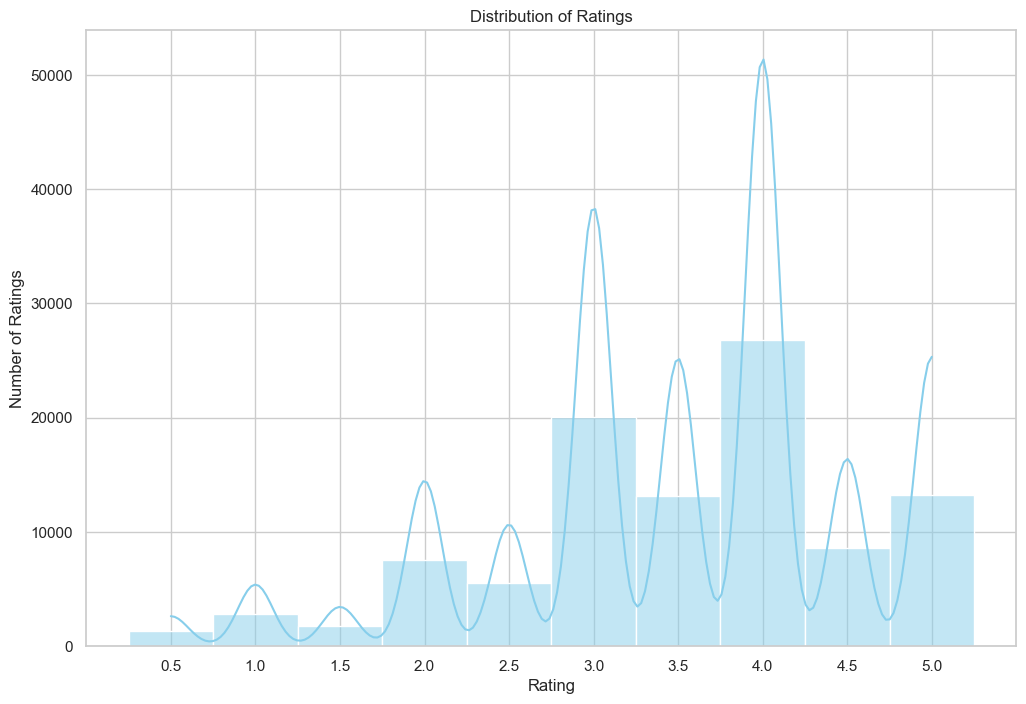

In [1460]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=ratings['rating'].sort_values().astype('str'), kde=True, color='skyblue') # Tried to make it look better using color attribute and kernel density estimation
ax.set(xlabel='Rating', ylabel='Number of Ratings', title='Distribution of Ratings')
plt.show()

We can see that the majority of the movies receive ratings ranging from 3 to 4, indicating that they have average ratings.

We can also see that the 0.5, 1.5, 2.5, 3, 5, and 4.5 are less in comparison to the integer ratings, we can study the reason in the next plot Q3b.


### Q3b:
What do you notice about the relative number of whole-number ratings (1,2,3,4,and 5) compared to the half-ratings (0.5, 1.5, 2.5, 3.5, 4.5)?  Investigate the data further to see if you can figure out why that's the case.  (Hint: a scatterplot showing the ratings vs. time might be helpful.)

Insert your observations here.

In [1461]:
ratings['year'] = pd.to_datetime(ratings['timestamp'], unit='s').dt.year # This will convert the timestamp to year

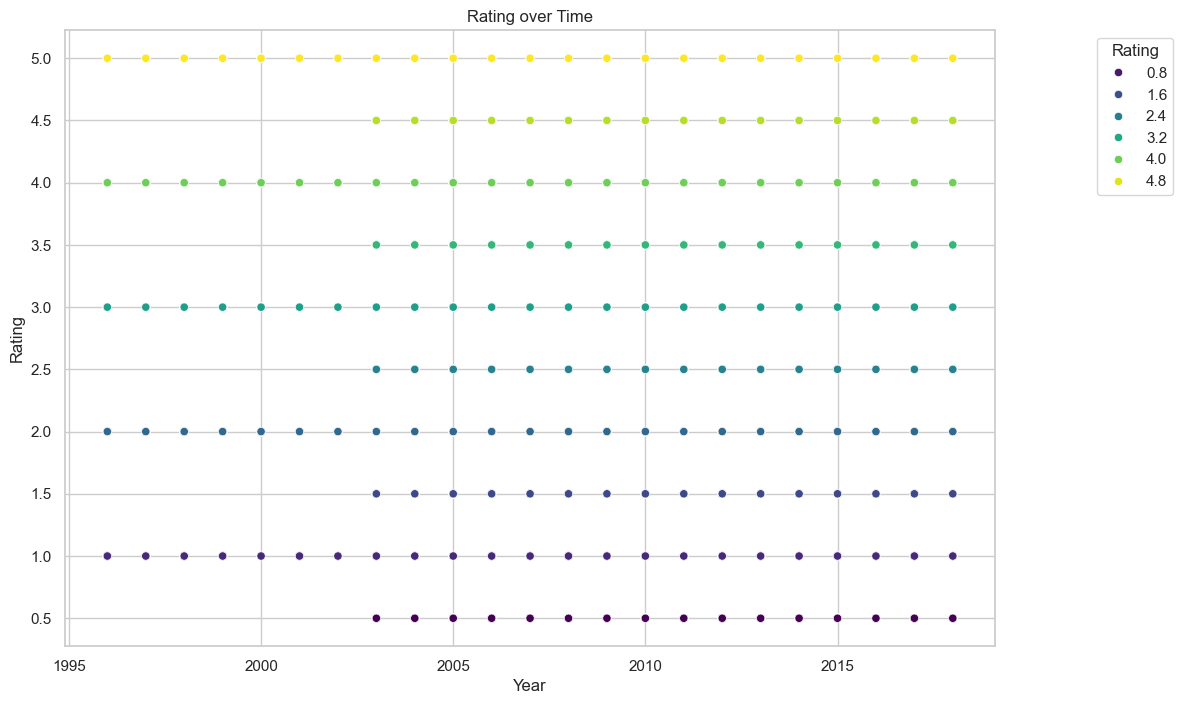

In [1462]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=ratings, x=ratings['year'], y=ratings['rating'], hue=ratings['rating'], palette='viridis') # This will create a scatterplot of the ratings over time
ax.set(xlabel='Year', ylabel='Rating', title='Rating over Time', yticks=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', title='Rating') # move the legend to the right, I have used Gpt to know how to change location of the legend
plt.show()


We can see why there are fewer 0.5, 1.5, 2.5, 3.5, and 4.5 because they were not available in movies prior to 2003. The scale changed in the early 2000s, and the need for a more distributed scale could be attributed to an increase in the number of movies produced during that time period.



### Q4:
Write code to confirm the assertion that the ratings ["were created by 610 users between March 29, 1996 and September 24, 2018."](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

In [1491]:
ratings['Time'] = pd.to_datetime(ratings['timestamp'], unit='s')


In [1464]:
ratings['Time'].min()

Timestamp('1996-03-29 18:36:55')

In [1465]:
ratings['Time'].max()

Timestamp('2018-09-24 14:27:30')

In [1466]:
User_id = ratings['userId'].nunique()
User_id


610

In [1467]:
start_time = pd.to_datetime('1996-03-29')
end_time = pd.to_datetime('2018-09-24')

In [1468]:
Filtered_ratings = ratings[(ratings['Time'] >= start_time) & (ratings['Time'] <= end_time)] # This will filter the ratings between the start and end time

In [1469]:
assert Filtered_ratings['userId'].nunique() == 610, 'Between 1996-03-29 and 2018-09-24, there should be 610 unique users' # This will check if the number of unique users is 610

With the above code we have confirmed the assertion that the ratings were created by 610 users between March 29, 1996 and September 24, 2018.

### Q5:
Create a visualization showing the number of ratings produced on each day of the week.  

Hint: the `pd.to_datetime()` function might be useful here, as well as the `dt` accessor.

Make sure your axis labels are in a reasonable order.

In [1470]:
# insert your code here
ratings['weekday'] = ratings['Time'].dt.day_name()

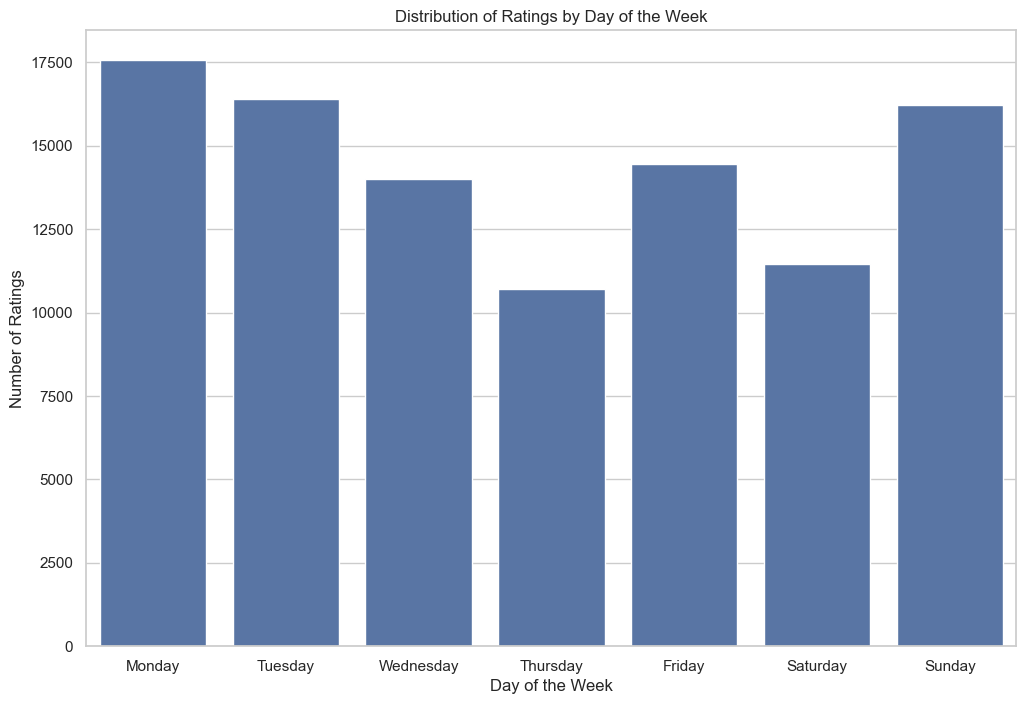

In [1471]:
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
ax = sns.countplot(data=ratings, x=ratings['weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) # This will create a countplot of the ratings by day of the week
ax.set(xlabel='Day of the Week', ylabel='Number of Ratings', title='Distribution of Ratings by Day of the Week')
plt.show()


We can see that the majority of the ratings are done on Sundays, Mondays, and Tuesdays. This could be because most people watch movies on weekends and write about them later.

We see an increase in the number of ratings from Thursday to Friday, which could be because most movies are released on Friday, allowing them to earn money over the weekend.

Thursday shows the lowest rating, this might be because of the above points.

### Q6a:

Create a new column called `taglength` in the `tags` DataFrame that contains the number of **characters** in the tag.

**Hint:** the `str.len()` function might be useful here.

In [1472]:
# insert your code here
tags['taglength'] = tags['tag'].str.len() # This will create a new column with the length of the tag
tags.head()

,userId,movieId,tag,timestamp,taglength
0,2,60756,funny,1445714994,5
1,2,60756,Highly quotable,1445714996,15
2,2,60756,will ferrell,1445714992,12
3,2,89774,Boxing story,1445715207,12
4,2,89774,MMA,1445715200,3


A new column taglength has been created, storing the length of the string tags.

### Q6b: 
Create a histogram of your newly created `taglength` column.  Experiment with different numbers of bins (or binwidths) until you're happy with the representation.

In [1473]:
num_bins = int(np.sqrt(len(tags['taglength']))) # This will calculate the number of bins using the square root of the number of tags
num_bins

60

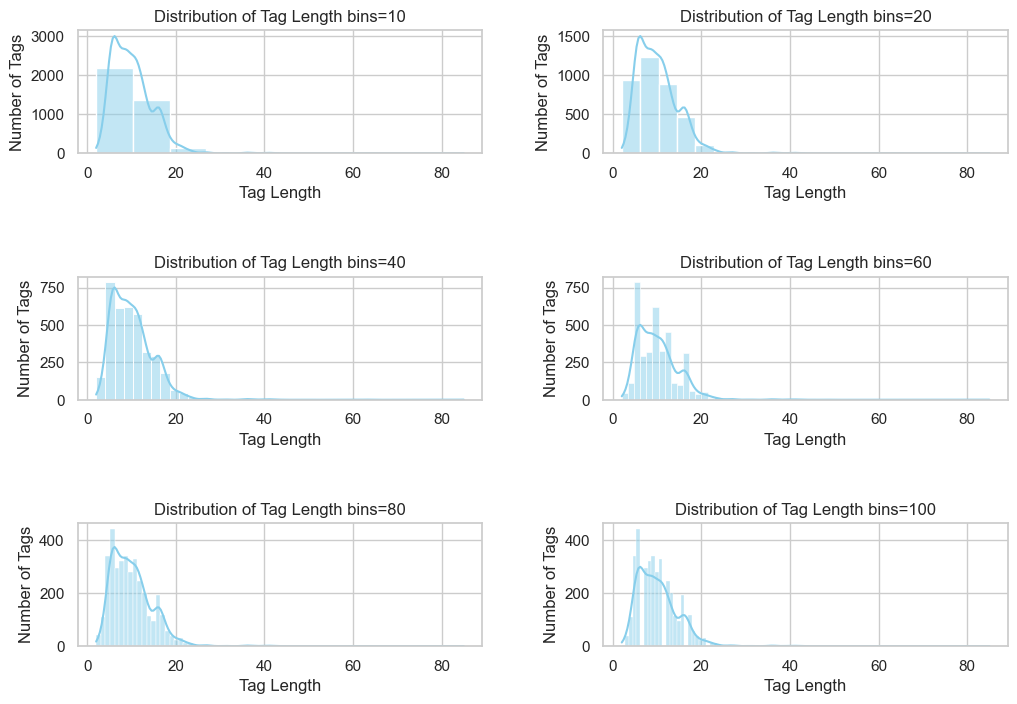

In [1474]:
f, ax = plt.subplots(3, 2, figsize=(12, 8))
f.subplots_adjust(wspace=0.3, hspace=1)
sns.histplot(data=tags, x='taglength', ax=ax[0, 0], color='skyblue', bins=10, kde=True)
ax[0, 0].set(xlabel='Tag Length', ylabel='Number of Tags', title='Distribution of Tag Length bins=10')
sns.histplot(data=tags, x='taglength', ax=ax[0, 1], color='skyblue', bins=20, kde=True)
ax[0, 1].set(xlabel='Tag Length', ylabel='Number of Tags', title='Distribution of Tag Length bins=20')
sns.histplot(data=tags, x='taglength', ax=ax[1, 0], color='skyblue', bins=40, kde=True)
ax[1, 0].set(xlabel='Tag Length', ylabel='Number of Tags', title='Distribution of Tag Length bins=40')
sns.histplot(data=tags, x='taglength', ax=ax[1, 1], color='skyblue', bins=60, kde=True)
ax[1, 1].set(xlabel='Tag Length', ylabel='Number of Tags', title='Distribution of Tag Length bins=60')
sns.histplot(data=tags, x='taglength', ax=ax[2, 0], color='skyblue', bins=80, kde=True)
ax[2, 0].set(xlabel='Tag Length', ylabel='Number of Tags', title='Distribution of Tag Length bins=80')
sns.histplot(data=tags, x='taglength', ax=ax[2, 1], color='skyblue', bins=100, kde=True)
ax[2, 1].set(xlabel='Tag Length', ylabel='Number of Tags', title='Distribution of Tag Length bins=100')
plt.show()

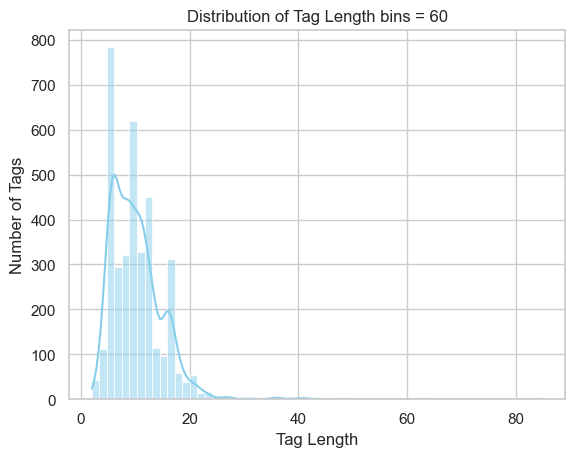

In [1475]:
ax = sns.histplot(data=tags, x='taglength', color='skyblue', bins=60, kde=True)
ax.set(xlabel='Tag Length', ylabel='Number of Tags', title='Distribution of Tag Length bins = 60')
plt.show()

There are a few ways to determine the number of bins, including the log method and the square root method. I used the square root method to obtain a value, then plotted the values near it and selected the appropriate number of bins. I see that bin sizes 40, 60, and 80 produce a good plot, indicating that values in that range will be appropriate, and using the square root method, I choose 60 as the number of bins.

I can also see that the kernel density estimator for number of bins 60 and 80 looks quite similar, indicating that maybe number of bins 60 is the right choice.


### Q7:
Create a visualization that shows the average rating for each genre.


In [1476]:
# insert your code here
Final_data = pd.merge(ratings, exploded_movie, on='movieId')


In [1477]:
Final_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
year_x       0
Time         0
weekday      0
title        0
genres       0
year_y       0
decade       0
dtype: int64

In [1478]:
genre_rating = Final_data.groupby('genres')['rating'].mean().reset_index() # This will calculate the mean rating for each genre

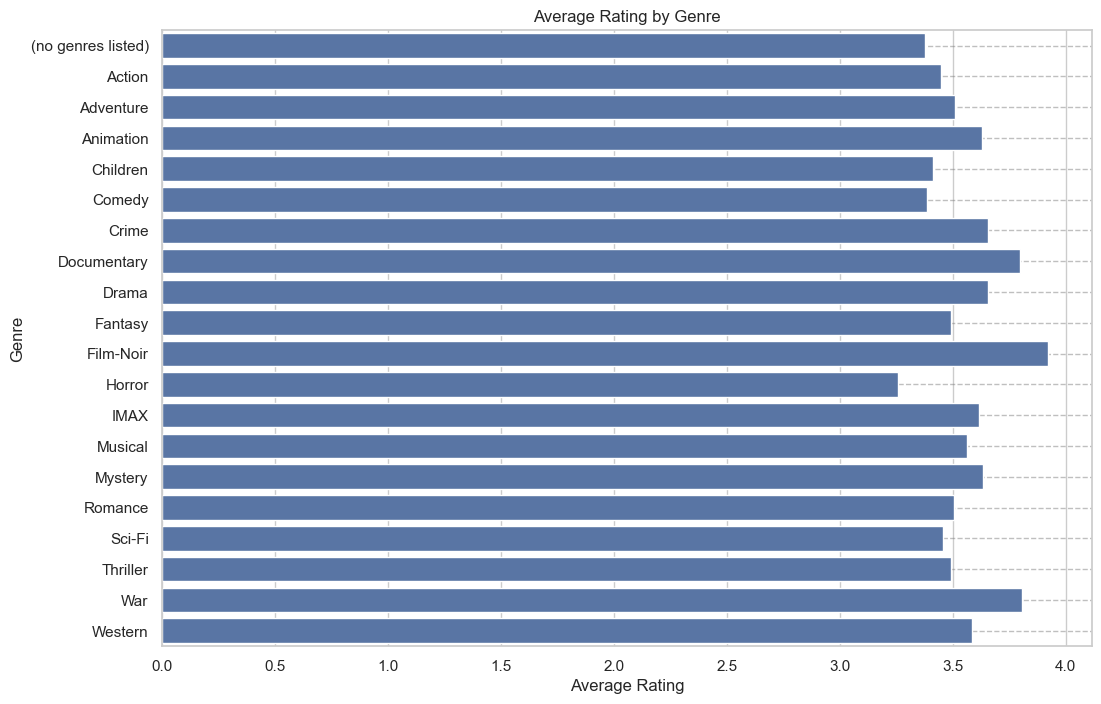

In [1479]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=genre_rating ,x='rating', y='genres')
ax.set(ylabel='Genre', xlabel='Average Rating', title='Average Rating by Genre')
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5) # Adding grid lines to the y-axis
plt.show()

We can see that the movie genre Film-Noir has the highest average rating, which could be because it is a very focused genre with fewer films than other genres.

The horror genre has the lowest average rating; the number of films falls around the normal range, maybe the horror genre is only enjoyed by a select few people, and not everyone enjoys it in general.

We can see that the average rating is in the range of 3.25 to 3.75, indicating that there is no genre that always has a higher or lower rating.




### Q8:
Create a visualization that shows the distribution of the **number** of ratings of "good" movies (i.e., those with a mean rating of 3.5 or highter) and "bad" movies (i.e., those with a mean rating of less than 3.5), broken down by the decade when the movie was released.

Note that you are not being asked to create a visualization that shows the distribution of the ratings themselves, but rather the distribution of the **number** of ratings for each of the two groups of movies.

**Hint:** You will need to join the `movies` and `ratings` DataFrames to get the decade information.

**Hint:** You may want to create a box plot or a violin plot (or both).

In [1480]:
movies .drop(columns='year', inplace=True)
merged_data = pd.merge(ratings, movies, on='movieId')

In [1481]:
mean_rating = merged_data.groupby('movieId')['rating'].mean().reset_index()

In [1482]:
mean_rating['Category'] = np.where(mean_rating['rating'] >= 3.5, 'good', 'bad') # This will create a new column with the category of the rating based on the mean rating
merged_mean_rating = pd.merge(merged_data, mean_rating, on='movieId')

In [1483]:
merged_mean_rating.rename(columns = {'rating_x': 'rating', 'rating_y': 'mean_rating'}, inplace = True) # This will rename the columns

In [1484]:
rating_counts = merged_mean_rating.groupby(['movieId', 'decade', 'Category']).size().reset_index(name='num_ratings').sort_values(by='decade')

In [1485]:
rating_counts[rating_counts['movieId'] == 1]

,movieId,decade,Category,num_ratings
0,1,1990s,good,215


/var/folders/5s/fpydwv6n7kzb46w2tptt4bjr0000gn/T/ipykernel_4696/261600981.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)


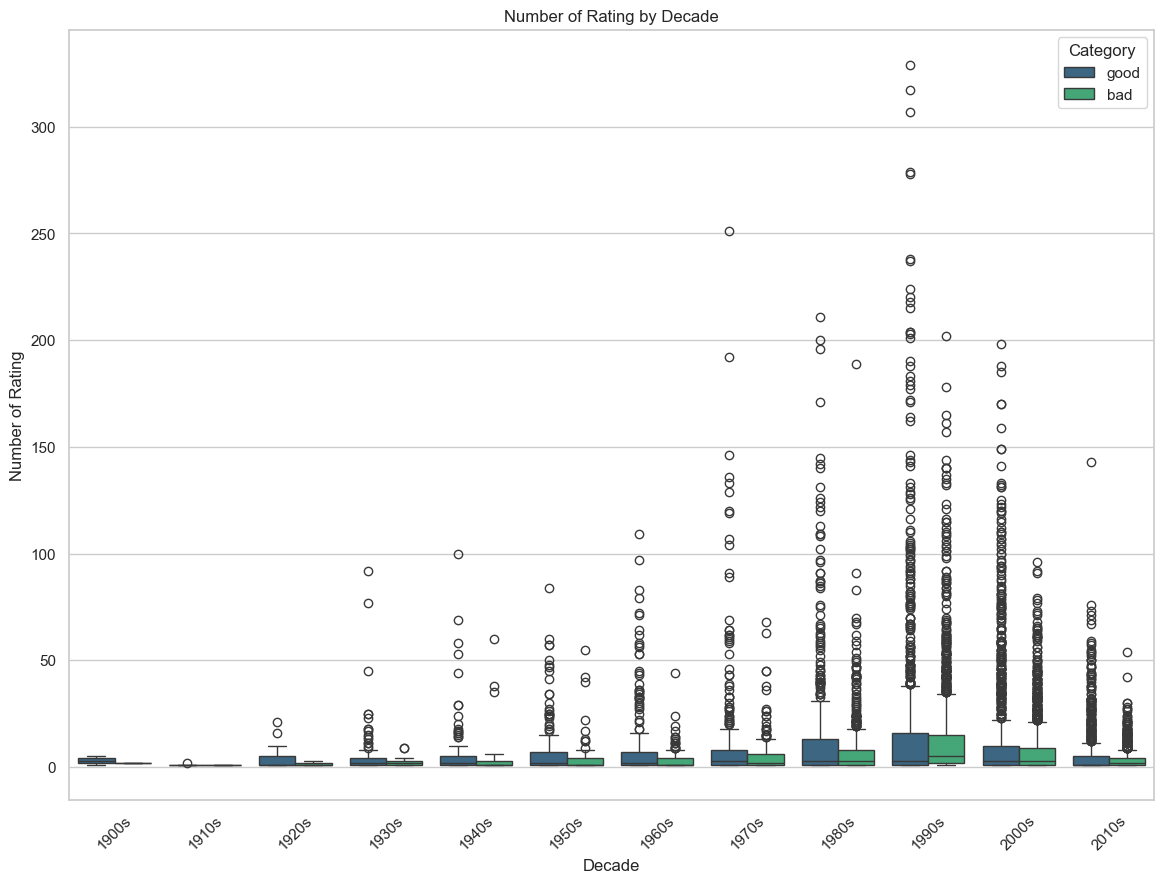

In [1486]:
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")
ax = sns.boxplot(data=rating_counts, x='decade', y='num_ratings', hue='Category', palette='viridis') # This will create a boxplot of the number of ratings by decade and category
ax.set(xlabel='Decade', ylabel='Number of Rating', title='Number of Rating by Decade')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

/var/folders/5s/fpydwv6n7kzb46w2tptt4bjr0000gn/T/ipykernel_4696/2850747541.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


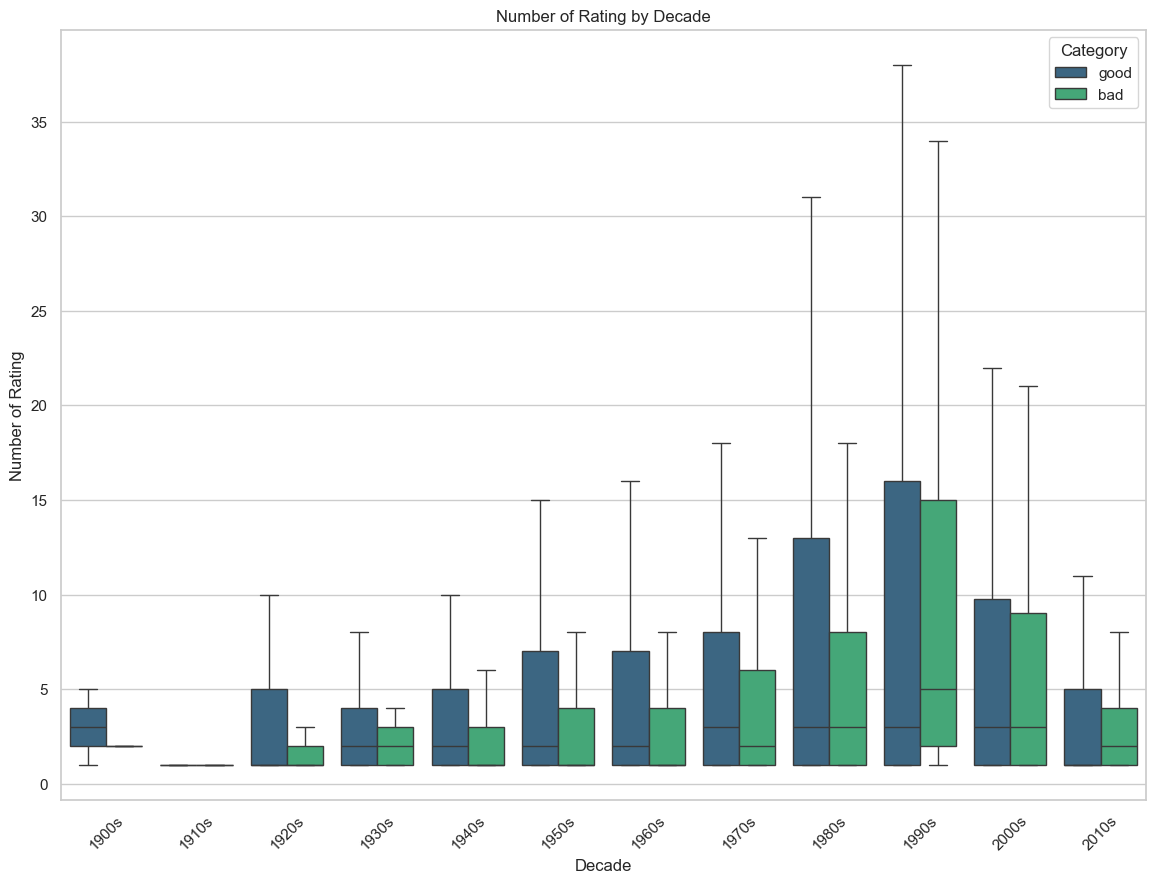

In [1487]:
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")
ax = sns.boxplot(data=rating_counts, x='decade', y='num_ratings', hue='Category', palette='viridis', showfliers = False) # This will create a boxplot of the number of ratings by decade and category without outliers
ax.set(xlabel='Decade', ylabel='Number of Rating', title='Number of Rating by Decade')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

/var/folders/5s/fpydwv6n7kzb46w2tptt4bjr0000gn/T/ipykernel_4696/2809842412.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=rating_counts, x='decade', y='num_ratings', hue='Category', split=True, width=1.0, palette='viridis', inner='quartile', scale='count')
/var/folders/5s/fpydwv6n7kzb46w2tptt4bjr0000gn/T/ipykernel_4696/2809842412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


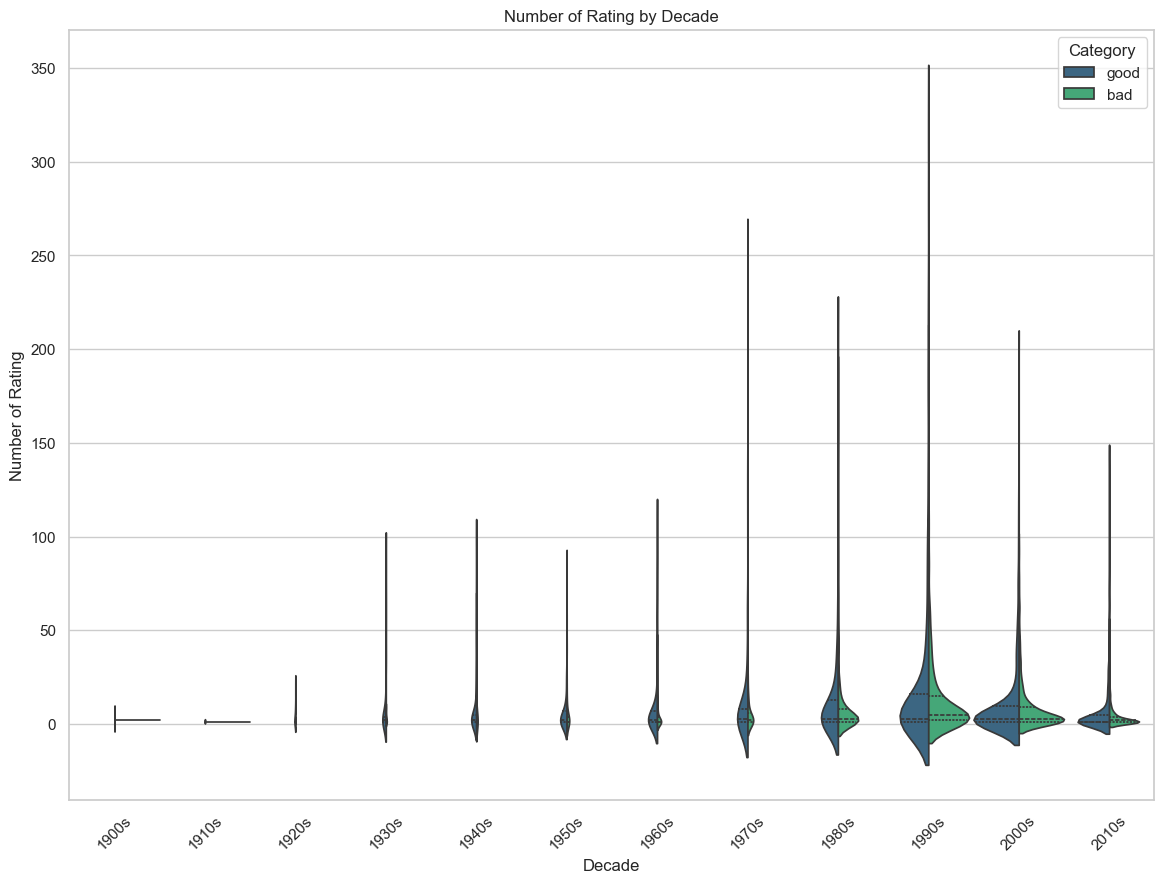

In [1488]:
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")
ax = sns.violinplot(data=rating_counts, x='decade', y='num_ratings', hue='Category', split=True, width=1.0, palette='viridis', inner='quartile', scale='count') # This will create a violinplot of the number of ratings by decade and category
ax.set(xlabel='Decade', ylabel='Number of Rating', title='Number of Rating by Decade')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

The box plot shows that the number of ratings increased from the 1900s to the 1990s, but then decreased in the 2000s.

We can see that a large number of outliers exist during the 1990s and 2000s. demonstrating that some films were released with a high number of ratings, both positive and negative.

We also see that the number of positive ratings is significantly higher than the number of negative ratings.

The violinplot also supports the boxplot by spreading the number of ratings.



## END OF NOTEBOOK